In [1]:
import pandas as pd

data = pd.read_parquet("./final_sampling_results.parquet.gzip")
data = data.rename(columns={"sampler": "Sampling scheme", "rtt": "RTT"})
data

,ground_truth,Sampling scheme,neuroticism,repetition,execution_time,duration,RTT,ttf,wait_time,num_samples,energy,P0,Pc,t0,tc
0,low,Greedy,n/a,3,3.815677,4.387500,0.3375,0.571823,2.343230e-01,13,0.080438,0.015,0.045,0.3,0.0375
1,low,Greedy,n/a,3,4.429755,5.062500,0.3375,0.632745,2.952447e-01,15,0.092813,0.015,0.045,0.3,0.0375
2,low,Greedy,n/a,3,4.407426,5.062500,0.3375,0.655074,3.175742e-01,15,0.092813,0.015,0.045,0.3,0.0375
3,low,Greedy,n/a,3,5.631260,6.075000,0.3375,0.443740,1.062396e-01,18,0.111375,0.015,0.045,0.3,0.0375
4,low,Greedy,n/a,3,4.281102,4.725000,0.3375,0.443898,1.063977e-01,14,0.086625,0.015,0.045,0.3,0.0375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,high,Offline optimum,n/a,100,7.554335,12.554335,5.0000,5.000000,0.000000e+00,1,0.329315,0.015,0.045,0.3,4.7000
699996,high,Offline optimum,n/a,100,3.358096,8.358096,5.0000,5.000000,0.000000e+00,1,0.266371,0.015,0.045,0.3,4.7000
699997,high,Offline optimum,n/a,100,4.789769,9.789769,5.0000,5.000000,-8.881784e-16,1,0.287847,0.015,0.045,0.3,4.7000
699998,high,Offline optimum,n/a,100,8.729351,13.729351,5.0000,5.000000,0.000000e+00,1,0.346940,0.015,0.045,0.3,4.7000


In [2]:
mean_per_step = (
    data
    .groupby(["ground_truth", "Sampling scheme", "neuroticism", "RTT", "repetition"], observed=True)
    .mean()
    .reset_index()
)

mean_per_step.groupby(["ground_truth", "Sampling scheme", "neuroticism", "RTT",], observed=True).mean()

repetition  execution_time  \
ground_truth Sampling scheme neuroticism RTT                                  
low          Greedy          n/a         0.3375        50.5        5.259357   
                                         0.6750        50.5        5.493951   
                                         1.2500        50.5        5.666214   
                                         2.5000        50.5        5.787089   
                                         5.0000        50.5        5.997641   
...                                                     ...             ...   
high         Offline optimum n/a         0.3375        50.5        5.251048   
                                         0.6750        50.5        5.269021   
                                         1.2500        50.5        5.770226   
                                         2.5000        50.5        5.961260   
                                         5.0000        50.5        7.053225   

                                                  duration       ttf  \
ground_truth Sampling scheme neuroticism RTT                           
low          Greedy          n/a         0.3375   5.769225  0.509868   
                                         0.6750   6.492420  0.998469   
                                         1.2500   7.538625  1.872411   
                                         2.5000   9.578250  3.791161   
                                         5.0000  13.501000  7.503359   
...                                                    ...       ...   
high         Offline optimum n/a         0.3375   5.588548  0.337500   
                                         0.6750   5.944021  0.675000   
                                         1.2500   7.020226  1.250000   
                                         2.5000   8.461260  2.500000   
                                         5.0000  12.053225  5.000000   

                                                    wait_time  num_samples  \
ground_truth Sampling scheme neuroticism RTT                                 
low          Greedy          n/a         0.3375  1.723684e-01      17.0940   
                                         0.6750  3.234694e-01       9.6184   
                                         1.2500  6.224109e-01       6.0309   
                                         2.5000  1.291161e+00       3.8313   
                                         5.0000  2.503359e+00       2.7002   
...                                                       ...          ...   
high         Offline optimum n/a         0.3375  1.857847e-16       1.0000   
                                         0.6750 -3.856915e-17       1.0000   
                                         1.2500 -3.397282e-18       1.0000   
                                         2.5000 -2.078338e-17       1.0000   
                                         5.0000 -1.110223e-17       1.0000   

                                                   energy     P0     Pc   t0  \
ground_truth Sampling scheme neuroticism RTT                                   
low          Greedy          n/a         0.3375  0.105769  0.015  0.045  0.3   
                                         0.6750  0.205593  0.015  0.045  0.3   
                                         1.2500  0.284960  0.015  0.045  0.3   
                                         2.5000  0.396540  0.015  0.045  0.3   
                                         5.0000  0.583243  0.015  0.045  0.3   
...                                                   ...    ...    ...  ...   
high         Offline optimum n/a         0.3375  0.084953  0.015  0.045  0.3   
                                         0.6750  0.100410  0.015  0.045  0.3   
                                         1.2500  0.133803  0.015  0.045  0.3   
                                         2.5000  0.192919  0.015  0.045  0.3   
                                         5.0000  0.321798  0.015  0.045  0.3   

                            

In [3]:
import numpy as np

def select_data_by_ground_truth(data: pd.DataFrame, ground_truth: str) -> pd.DataFrame:
    data = data[
        (data["ground_truth"] == ground_truth)
        & np.isin(data["neuroticism"], (ground_truth, "n/a"))
    ].copy()

    data["ground_truth"] = data["ground_truth"].cat.remove_unused_categories()
    data["neuroticism"] = data["neuroticism"].cat.remove_unused_categories()

    # print(ground_truth, data["ground_truth"].unique(), data["neuroticism"].unique())

    return data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns.set_palette("Dark2")

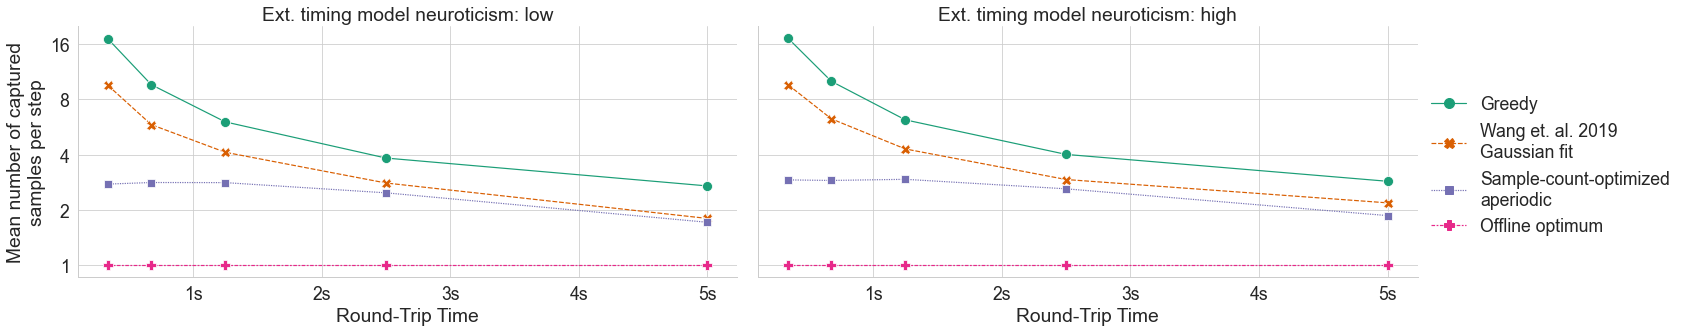

In [12]:
def plot_mean_something(data: pd.DataFrame, column: str, *args, **kwargs):
    ax = plt.gca()
    gts = data["ground_truth"].unique()
    assert gts.size == 1

    ground_truth = gts[0]
    selected_data = select_data_by_ground_truth(data, ground_truth)

    sns.lineplot(
        data=selected_data,
        errorbar=("ci", 95),
        err_style="bars",
        x="RTT",
        y=column,
        hue="Sampling scheme",
        style="Sampling scheme",
        markers=True,
        markersize=10,
        ax=ax,
    )

mean_without_energy = mean_per_step[mean_per_step["Sampling scheme"] != "Energy-optimized\naperiodic"].copy()
mean_without_energy["Sampling scheme"] = mean_without_energy["Sampling scheme"].cat.remove_unused_categories()

fg = sns.FacetGrid(mean_without_energy, col="ground_truth", aspect=2, height=5)
fg.map_dataframe(plot_mean_something, column="num_samples")
fg.set_axis_labels("Round-Trip Time", "Mean number of captured\nsamples per step")
fg.set(yticks=[2**i for i in range(5)])
fg.add_legend()
for legend_handle in fg.legend.legendHandles:
    legend_handle.set_markersize(10)

plt.yscale('log', base=2)
for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x:0.0f}s"))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:0.0f}"))

fg.set_titles(col_template="Ext. timing model neuroticism: {col_name}")
plt.show()

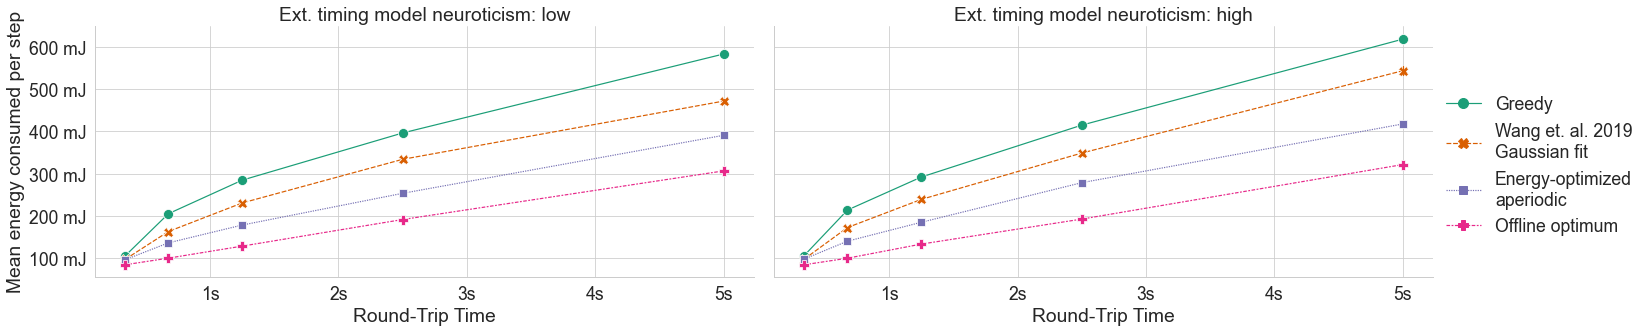

In [10]:
mean_without_samples = mean_per_step[mean_per_step["Sampling scheme"] != "Sample-count-optimized\naperiodic"].copy()
mean_without_samples["Sampling scheme"] = mean_without_samples["Sampling scheme"].cat.remove_unused_categories()

fg = sns.FacetGrid(mean_without_samples, col="ground_truth", aspect=2, height=5)
fg.map_dataframe(plot_mean_something, column="energy")
fg.set_axis_labels("Round-Trip Time", "Mean energy consumed per step")
# fg.set(yticks=[2**i for i in range(5)])
fg.add_legend()
for legend_handle in fg.legend.legendHandles:
    legend_handle.set_markersize(10)

for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x:0.0f}s"))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y * 1000:1.0f} mJ"))

fg.set_titles(col_template="Ext. timing model neuroticism: {col_name}")

plt.show()

/Users/molguin/.venvs/EdgeDroid/lib/python3.10/site-packages/pingouin/parametric.py:261: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=True, alternative=alternative)
/Users/molguin/.venvs/EdgeDroid/lib/python3.10/site-packages/pingouin/parametric.py:261: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=True, alternative=alternative)
/Users/molguin/.venvs/EdgeDroid/lib/python3.10/site-packages/pingouin/parametric.py:261: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=True, alternative=alternative)
/Use

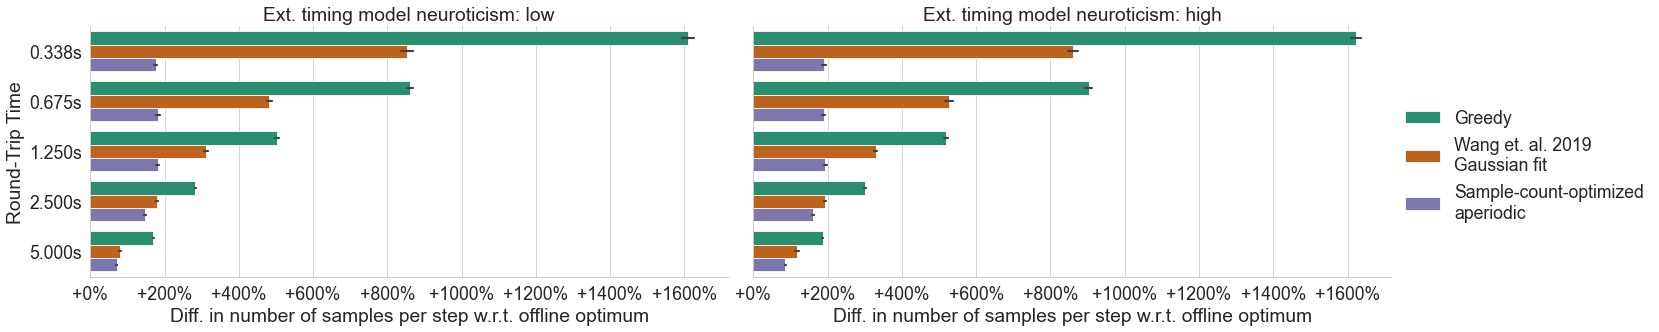

In [13]:
import pingouin as pg

ix = pd.IndexSlice

def format_rtt(v: float) -> str:
    return f"{v:.3f}s"

def plot_diff_wrt_ideal(data: pd.DataFrame, column: str, *args, **kwargs):
    def diff_wrt_ref(df: pd.DataFrame) -> pd.DataFrame:
        ref_values = df.loc[df["Sampling scheme"] == "Offline optimum", column].to_numpy()
        ref_mean = ref_values.mean()

        def _diff_wrt_ref(samples: pd.Series) -> pd.Series:
            ttest = pg.ttest(samples.to_numpy(), ref_values, alternative="two-sided")
            diff_raw = samples.mean() - ref_mean
            diff = diff_raw / ref_mean
            ci = ttest.at["T-test", "CI95%"]

            pval = ttest.at["T-test", "p-val"]
            sig_pval = pval < 0.05

            return pd.Series({
                "diff"     : diff,
                "diff_raw" : diff_raw,
                "p-val"    : pval,
                "p < 0.05" : sig_pval,
                "CI95_Low" : ci[0] / ref_mean,
                "CI95_High": ci[1] / ref_mean}, name="Result")

        return df.groupby(["Sampling scheme", "neuroticism"])[column].apply(_diff_wrt_ref).to_frame()

    gts = data["ground_truth"].unique()
    assert gts.size == 1
    ground_truth = gts[0]
    selected_data = select_data_by_ground_truth(data, ground_truth)

    diff_df = selected_data.groupby(["RTT"]).apply(diff_wrt_ref).unstack()
    diff_df.columns = diff_df.columns.droplevel(0)
    diff_df = (
        diff_df
        .reset_index()
        .set_index(["Sampling scheme", "neuroticism", "RTT"], verify_integrity=True)
        [["CI95_Low", "CI95_High", "diff"]]
        .stack()
        .reset_index()
        .rename(columns={"level_3": "metric", 0: "value"})
    )


    diff_df["RTT"] = (
        diff_df["RTT"]
        .apply(format_rtt)
        .astype(
            pd.CategoricalDtype([format_rtt(v) for v in sorted(diff_df["RTT"].unique())], ordered=True)
        )
    )
    diff_df = diff_df[diff_df["Sampling scheme"] != "Offline optimum"]
    diff_df["Sampling scheme"] = diff_df["Sampling scheme"].cat.remove_unused_categories()
    # ax = plt.gca()
    # print(diff_df)
    sns.barplot(
        estimator=lambda e: sorted(e)[1],
        errorbar=lambda e: (min(e), max(e)),
        ax=plt.gca(),
        data=diff_df,
        x="value",
        y="RTT",
        hue="Sampling scheme",
    )

    # return diff_df

fg = sns.FacetGrid(mean_without_energy, col="ground_truth", aspect=2, height=5)
fg.map_dataframe(plot_diff_wrt_ideal, column="num_samples")
fg.set_axis_labels("Diff. in number of samples per step w.r.t. offline optimum", "Round-Trip Time")
fg.add_legend()

for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x:+0.0%}"))

fg.set_titles(col_template="Ext. timing model neuroticism: {col_name}")
plt.show()

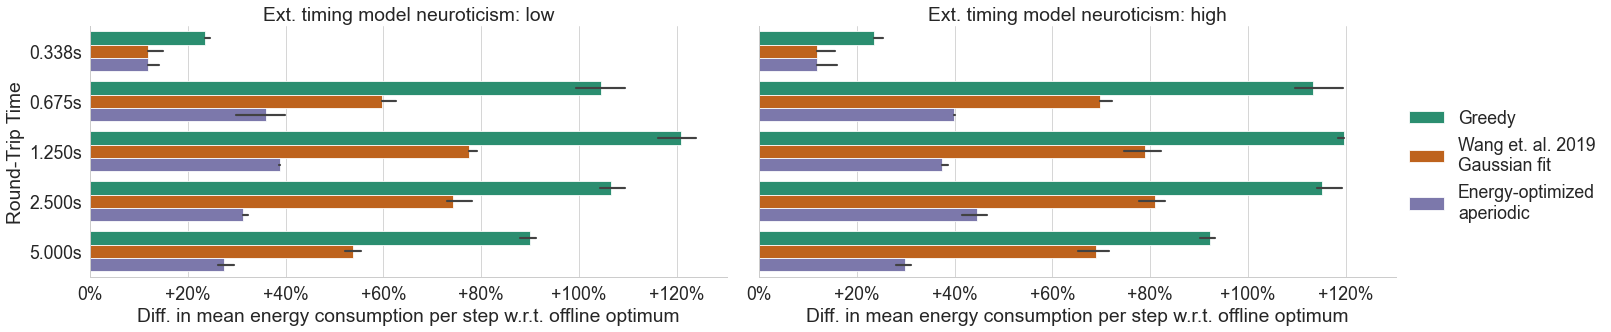

In [14]:
fg = sns.FacetGrid(mean_without_samples, col="ground_truth", aspect=2, height=5)
fg.map_dataframe(plot_diff_wrt_ideal, column="energy")
fg.set_axis_labels("Diff. in mean energy consumption per step w.r.t. offline optimum", "Round-Trip Time")
fg.add_legend()

for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x:+0.0%}" if x > 0 else f"{x:0.0%}"))

fg.set_titles(col_template="Ext. timing model neuroticism: {col_name}")
plt.show()